# <b> The Sparks Foundation <b> <br>
## GRIP program

# <b> Author : Katkuri Sai Vamshi <b>

## Task 2 :Prediction Using Unsupervised ML (clustering)

### Finding optimum number of clusters from Iris Dataset

### Data Preprocessing

In [1]:
## Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Importing the Iris dataset
iris=pd.read_csv('Iris.csv')
x = iris.iloc[:, 1:6].values
print("Dataset successfully imported")

Dataset successfully imported


### Data types in the dataset

In [3]:
iris.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
shape=iris.shape
print("The number of rows and columns ",shape)

The number of rows and columns  (150, 6)


#### Columns in the dataset

In [5]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Showing some basic stats 

In [6]:
iris.iloc[:,1:5].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.describe(include=object)

,Species
count,150
unique,3
top,Iris-virginica
freq,50


#### Displaying first 10 rows of dataset

In [8]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Displaying last 10 rows of dataset

In [9]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


#### Count of different Species

In [10]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

#### Removing Id column 

In [11]:
iris=iris.drop(["Id"],axis=1)

#### Shape of dataset after dropping id

In [12]:
iris.shape

(150, 5)

### Visualizing through pair plots

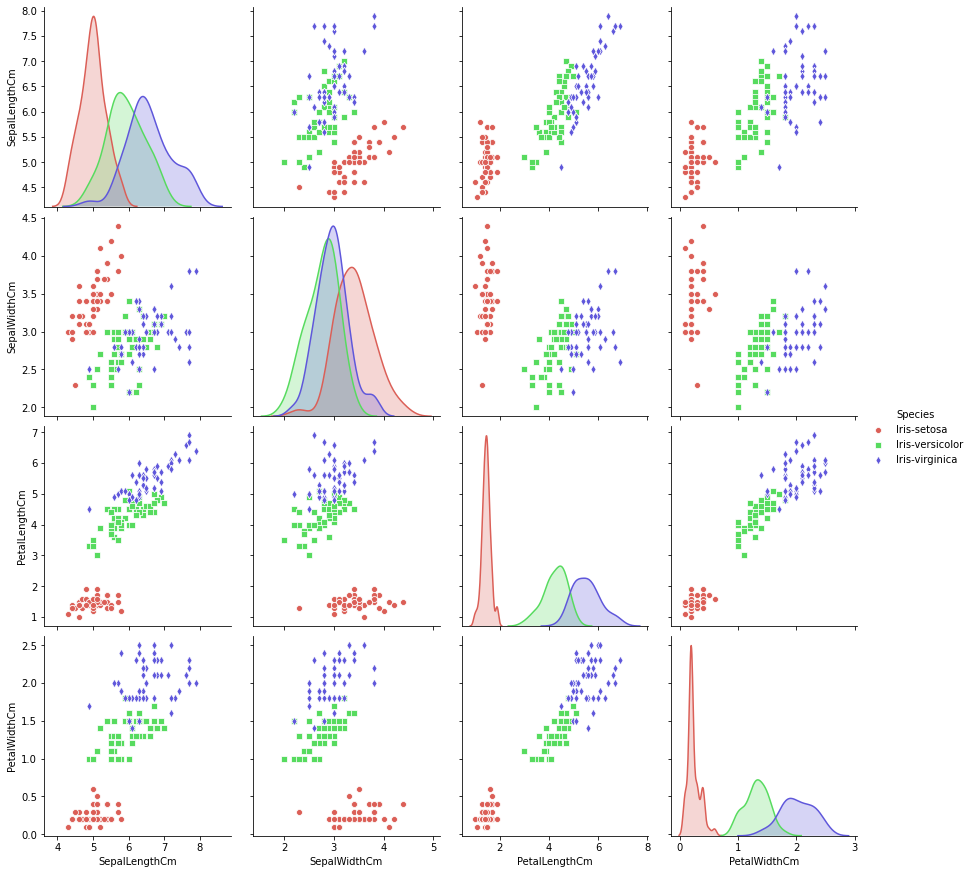

In [13]:
sns.pairplot(iris,hue="Species",markers=["o","s","d"],palette="hls",height=3)

### Visualizing through box plots

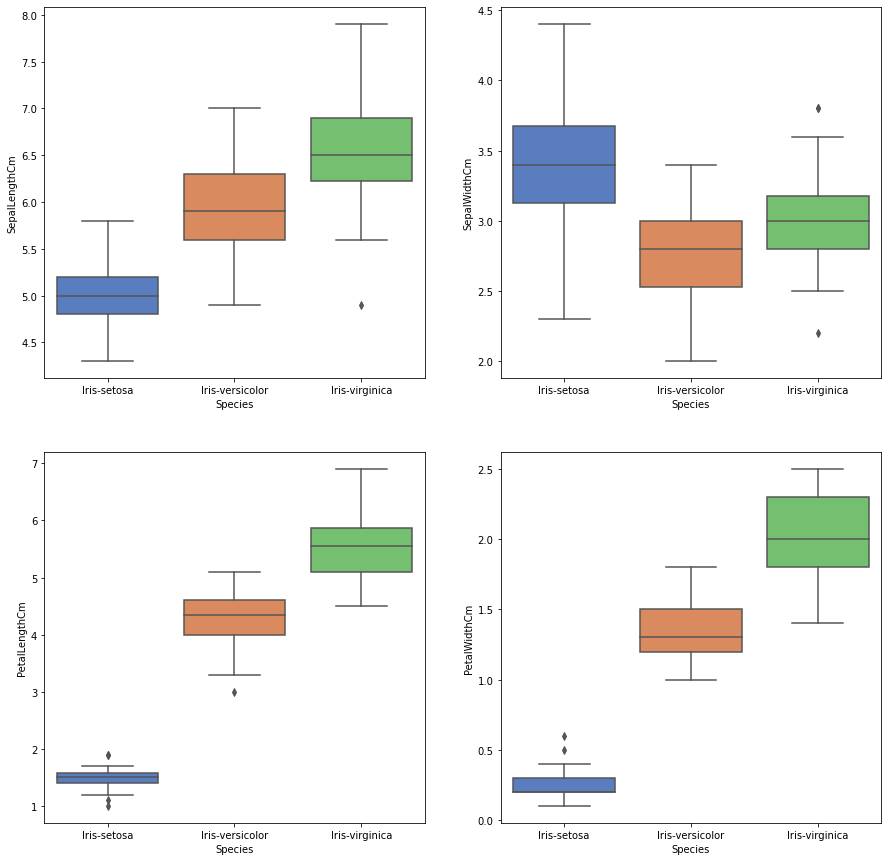

In [14]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="SepalLengthCm",data=iris,palette="muted")
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="SepalWidthCm",data=iris,palette="muted")
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="PetalLengthCm",data=iris,palette="muted")
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="PetalWidthCm",data=iris,palette="muted")

#### Correlation between variables in dataset

In [15]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


#### Using Heatmaps to visuaalize correlation

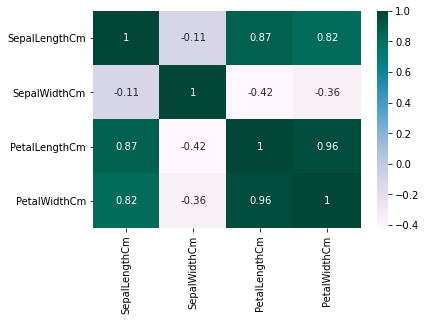

In [16]:
sns.heatmap(iris.corr(),annot=True,cmap="PuBuGn")

### Finding the optimal number of clusters

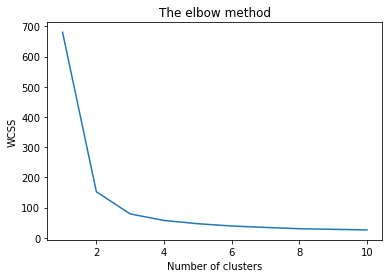

In [17]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x[:,0:4])
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

#### From the above curve we can see that the elbow poin is at 3 <br> so, the number of clusters=3

### Implementing the k-means to the dataset

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x[:,0:4])
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### Visualizing the clusters

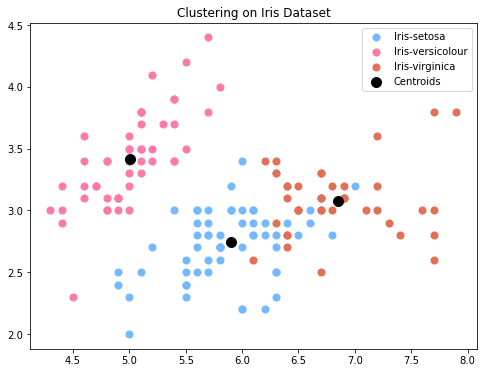

In [34]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = '#74b9ff', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = '#fd79a8', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = '#e17055', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')


plt.title("Clustering on Iris Dataset")

plt.legend()

### Plotting a 3d graph for the cluster representation

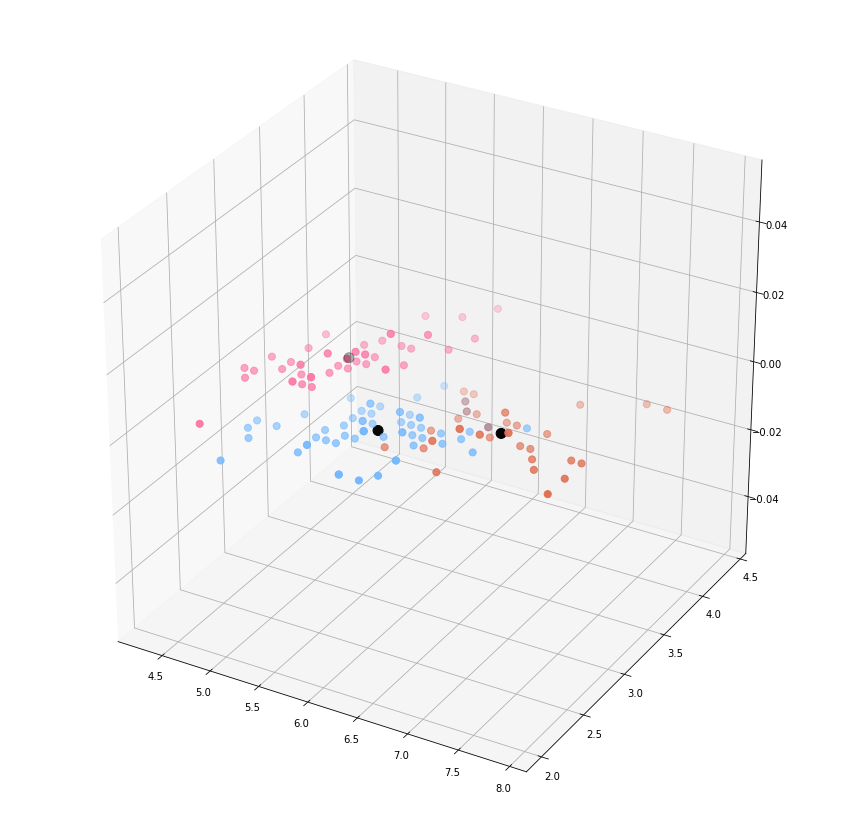

In [33]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection="3d")
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = '#74b9ff', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = '#fd79a8', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = '#e17055', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
plt.show()